# Example 4: Video analysis - predator prey interactions

This example features analysis of predator-prey interactions of one threespine stickleback (*Gasterosteus aculeatus*) and 20 benthic isopods (*Asellus aquaticus*). The goal is to extract movement trajectories of both species in response to each other, to see if isopods are reacting to the fish, and the other way round. At the same time, isopod pigmentation is measured in every frame to measure whether the fish has preferences for a particular phenotype (dark vs. light pigmentation, large bodied individuals).

The full video can be found here: https://vimeo.com/283075068

<div class="row; text-align: left">
    
<div class="col-md-6">
    
![Fish movement](_figures/ex4_after1.png)
    
**Fish movement** - Fish movement is extracted by following the movement of the single biggest object.
</div>
<div class="col-md-6">

![Isopod movement](_figures/ex4_after2.png)
    
**Isopod movement** - Movement of isopods over 15 seconds. 
</div>
</div>

## Video tracking with phenopype

In [1]:
import os
import pandas as pd
import phenopype as pp
import trackpy as tp # can be installed using pip

In [5]:
video_path =  r"images/isopods_fish.mp4"
out_dir =  r"_temp/output/ex4"

First we initialize the motion tracker with our example video, and specify the video output.

In [6]:
mt = pp.motion_tracker(video_path)

mt.video_output(save_suffix="v1", dirpath=out_dir)



--------------------------------------------------------------
Input video properties - "isopods_fish.mp4":

Frames per second: 29.97000099996667
N frames: 450
Length: 00:15 (mm:ss)
Dimensions: (960, 540)
Colour video: True
FourCC code: avc1
--------------------------------------------------------------
Save folder _temp/output/ex4 does not exist - create?.y


--------------------------------------------------------------
Output video settings - "isopods_fish.mp4":

Save name: isopods_fish_v1.mp4
Save dir: E:\git_repos\phenopype\_temp\output\ex4
Frames per second: 29.97000099996667
Dimensions: (960, 540)
Colour video: True
Format (FourCC code): avc1
--------------------------------------------------------------


Then we create a mask to only include the gravel area - this will exclude the walls where reflections and floating particles may result in false positives. A second mask in the center of the area can later be used to compare whether isopods tend to stay more on the side (shy behavior) or whether they move freely (bold behavior). In each captured frame there will be an entry for each isopods in which area it was detected. 

<center>
<div style="width:600px; text-align: left" >
    
![Canvas masking](_figures/tracking4.jpg)
    
**Masking ** - on one hand we want to exclude unwanted areas, on the other hand, we want to see when isopds stays in the center or not.  
    
</div>
</center>

In [7]:
pp.preprocessing.create_mask(mt, label="full arena")
pp.preprocessing.create_mask(mt, label="center")

- create mask


Now we set up two `tracking_methods`: the "fish" method is set to `"single"` and will only capture the largest object, whereas the isopod method will capture all objects smaller than 30 pixels. You can play around with `blur` and `threshold` settings to see if you can get better results. The `operations` argument is used to return specific information of the detected objects. We specify a few parameters to retrieve phenotypic information of the isopods. Later, we can then analyze which phenotypes were foraged on which sediment background.  

In [8]:
fish = pp.tracking_method(label="fish", remove_shadows=True, min_length=30,
                          overlay_colour="red", mode="single", 
                          blur=15, # bigger blurring kernel
                          threshold=200 #higher sensitivity
                         ) 
isopod = pp.tracking_method(label="isopod", remove_shadows=True, max_length=30,
                            overlay_colour="green", mode="multiple",
                            blur=9, # smaller blurring kernel
                            threshold=180, # lower sensitivity
                            operations=["diameter",  # isopod size
                                        "area",      # isopod area
                                        "grayscale", # isopod pigmentation 
                                        "grayscale_background"] # background darkness
                           )

Finally, we pass the methods on the detection settings, and also activate *consecutive masking* (`c_mask=True`). This option will prohibit repeated detection of objects when several tracking methods are applied. For example, inside the detected fish-area sometimes isopod objects are detected, due to artifacts or incomplete subtraction results. Consecutive masking will "block" an area after the first method has been applied - the order by which methods are applied matters. The following settings will create a rectangle shaped mask around the fish with a 200 pixel border.

In [9]:
mt.detection_settings(methods=[fish, isopod],
                     c_mask=True,
                     c_mask_shape="rect",
                     c_mask_size=200)

{'blur_kernel': 15,
 'label': 'fish',
 'max_area': inf,
 'max_length': inf,
 'min_area': 0,
 'min_length': 30,
 'mode': 'single',
 'operations': [],
 'overlay_colour': (0, 0,
                    255),
 'remove_shadows': True,
 'threshold_value': 200}
{'blur_kernel': 9,
 'label': 'isopod',
 'max_area': inf,
 'max_length': 30,
 'min_area': 0,
 'min_length': 0,
 'mode': 'multiple',
 'operations': ['diameter',
                'area',
                'grayscale',
                'grayscale_background'],
 'overlay_colour': (0, 255,
                    0),
 'remove_shadows': True,
 'threshold_value': 180}


--------------------------------------------------------------
Motion detection settings - "isopods_fish.mp4":

Background-subtractor: MOG
History: 60 seconds
Sensitivity: 10
Read every nth frame: 5
Detect shadows: True
Start after n seconds: 0
Finish after n seconds:  - 
--------------------------------------------------------------


In [10]:
coordinates = mt.run_tracking()

Time: 00:00/00:15 - Frames: 1/450
Time: 00:00/00:15 - Frames: 2/450
Time: 00:00/00:15 - Frames: 3/450
Time: 00:00/00:15 - Frames: 4/450
Time: 00:00/00:15 - Frames: 5/450 - captured
Time: 00:00/00:15 - Frames: 6/450
Time: 00:00/00:15 - Frames: 7/450
Time: 00:00/00:15 - Frames: 8/450
Time: 00:00/00:15 - Frames: 9/450
Time: 00:00/00:15 - Frames: 10/450 - captured
Time: 00:00/00:15 - Frames: 11/450
Time: 00:00/00:15 - Frames: 12/450
Time: 00:00/00:15 - Frames: 13/450
Time: 00:00/00:15 - Frames: 14/450
Time: 00:00/00:15 - Frames: 15/450 - captured
Time: 00:00/00:15 - Frames: 16/450
Time: 00:00/00:15 - Frames: 17/450
Time: 00:00/00:15 - Frames: 18/450
Time: 00:00/00:15 - Frames: 19/450
Time: 00:00/00:15 - Frames: 20/450 - captured
Time: 00:00/00:15 - Frames: 21/450
Time: 00:00/00:15 - Frames: 22/450
Time: 00:00/00:15 - Frames: 23/450
Time: 00:00/00:15 - Frames: 24/450
Time: 00:00/00:15 - Frames: 25/450 - captured
Time: 00:00/00:15 - Frames: 26/450
Time: 00:00/00:15 - Frames: 27/450
Time: 00:

Time: 00:07/00:15 - Frames: 231/450
Time: 00:07/00:15 - Frames: 232/450
Time: 00:07/00:15 - Frames: 233/450
Time: 00:07/00:15 - Frames: 234/450
Time: 00:07/00:15 - Frames: 235/450 - captured
Time: 00:07/00:15 - Frames: 236/450
Time: 00:07/00:15 - Frames: 237/450
Time: 00:07/00:15 - Frames: 238/450
Time: 00:07/00:15 - Frames: 239/450
Time: 00:08/00:15 - Frames: 240/450 - captured
Time: 00:08/00:15 - Frames: 241/450
Time: 00:08/00:15 - Frames: 242/450
Time: 00:08/00:15 - Frames: 243/450
Time: 00:08/00:15 - Frames: 244/450
Time: 00:08/00:15 - Frames: 245/450 - captured
Time: 00:08/00:15 - Frames: 246/450
Time: 00:08/00:15 - Frames: 247/450
Time: 00:08/00:15 - Frames: 248/450
Time: 00:08/00:15 - Frames: 249/450
Time: 00:08/00:15 - Frames: 250/450 - captured
Time: 00:08/00:15 - Frames: 251/450
Time: 00:08/00:15 - Frames: 252/450
Time: 00:08/00:15 - Frames: 253/450
Time: 00:08/00:15 - Frames: 254/450
Time: 00:08/00:15 - Frames: 255/450 - captured
Time: 00:08/00:15 - Frames: 256/450
Time: 00:

Time: 00:14/00:15 - Frames: 446/450
Time: 00:14/00:15 - Frames: 447/450
Time: 00:14/00:15 - Frames: 448/450


After completing the tracking, we end up with a big data frame of all contours

In [11]:
coordinates.to_csv(os.path.join(out_dir, mt.name + "coordinates.csv"), sep=',')
coordinates

,frame_abs,frame,mins,secs,x,y,diameter,area,grayscale,grayscale_background,label,full arena,center
0,30,6,00,01,608.0,345.0,7.0,23.0,136.0,130.0,isopod,True,True
1,30,6,00,01,546.0,249.0,11.0,54.0,116.0,106.0,isopod,NaN,NaN
2,35,7,00,01,575.0,306.0,8.0,47.0,125.0,117.0,isopod,True,True
3,45,9,00,01,193.0,305.0,5.0,13.0,185.0,173.0,isopod,True,False
4,50,10,00,01,193.0,308.0,7.0,27.0,166.0,150.0,isopod,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
416,445,89,00,14,556.0,203.0,14.0,81.0,138.0,121.0,isopod,True,False
417,445,89,00,14,544.0,191.0,18.0,101.0,148.0,115.0,isopod,NaN,NaN
418,445,89,00,14,189.0,127.0,10.0,49.0,112.0,88.0,isopod,NaN,NaN
419,445,89,00,14,208.0,129.0,14.0,104.0,148.0,128.0,isopod,NaN,NaN


## Analyzing tracking results with `trackpy`

Now we can use the frame-wise coordinates to construct trajectories of isopods and fish. For this we will use the excellent `trackpy` library (http://soft-matter.github.io/trackpy/v0.4.2/). Trackpy is a Python package for particle tracking in 2D, 3D, and higher dimensions. 

Here you need to find out what works best for your specific case - the larger search_range or memory are, the more challenging it is for the algorithm to find a solution, especially if you have many moving objects in your video. With only one, it should be ok to go to high values. The filtering step is optional, but can be useful to eliminate spurious trajectories.

Frame 89: 1 trajectories present.


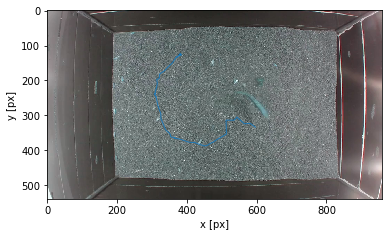

In [12]:
## fish trajectories
fish_df = coordinates[coordinates['label'] == "fish" ] # just use the fish-coordinates
traj_fish = tp.link_df(fish_df, 
                       search_range = 100, #how for to look for the fish in the next frame. can be large if fish swims fast
                       memory=60, # how long can the fish sit still
                       neighbor_strategy="KDTree", 
                       link_strategy="nonrecursive")
traj_fish_filter = tp.filtering.filter_stubs(traj_fish, 
                                             threshold=20) # filter out particles that were only found 20 times

## plot 
plot = tp.plot_traj(traj_fish_filter, 
                    superimpose=mt.image)
fig1 = plot.get_figure()
fig1.savefig(os.path.join(out_dir, mt.name + "_fish_trajectories.png"), dpi=300)

For isopods, we perform one additional step: because we know that we have 20 isopds, we remove frames with more particles.

Frame 89: 5 trajectories present.


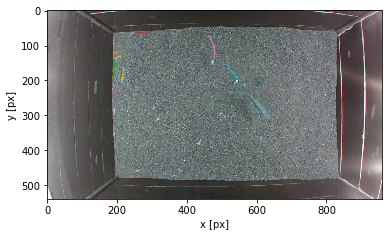

In [13]:
## isopod trajectories
df_isopod = coordinates[coordinates['label'] == "isopod" ] # just use the isopod-coordinates
df_isopod_filtered = df_isopod.groupby("frame").filter(lambda x: len(x) < 20)  # filter out frames with too many points
traj_isopod = tp.link(df_isopod_filtered, 
                      search_range = 50, # isopods are slow, so this can be small. especially important when using "multiple"
                      memory=200, # isopods can sit still longer
                      neighbor_strategy="KDTree", 
                      link_strategy="nonrecursive")
traj_isopod_filter = tp.filtering.filter_stubs(traj_isopod, 
                                               threshold=10) # each particle needs to be found at least 10 times 

##p lot
plot = tp.plot_traj(traj_isopod_filter, superimpose=mt.image, colorby="particle")
fig1 = plot.get_figure()
fig1.savefig(os.path.join(out_dir, mt.name + "_isopod_trajectories.png"), dpi=300)

Finally we save all trajectories into one DataFrame and export them into to the specified directory, so you can do fine tuning in your favorite data analysis program (e.g. R or in Python with Pandas).

In [15]:
# save all
df = traj_isopod_filter.append(pd.DataFrame(data = traj_fish_filter), ignore_index=True)
df.to_csv(os.path.join(out_dir, mt.name + "_trajectories.csv"), sep=',')